This notebook reproduces Figure S1 in "Integrating human biophysics and data-driven analysis to assess humidity’s role in heatstroke prediction" by Kong et al.

In [1]:
"""
import python packages
please install required packages before running this notebook
"""
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr

In [2]:
# read in mean absolute prediction error of GHSI
mae=xr.open_dataset('../data/GHSI_MAE.nc').MAE
"""
MAE of daily heatstroke prediction at each prefecture (dim: pf);
Conditional on a wide range of humidity weight (dim: beta);
For both outdoor and indoor versions (dim: exposure) of General Heat Stress Index (GHSI);
MAE is calculated as an average across the validation periods of 10-fold cross validation
"""
mae

<xarray.DataArray 'MAE' (pf: 47, exposure: 2, beta: 2451)>
[230394 values with dtype=float64]
Coordinates:
  * beta      (beta) float64 -8.0 -7.99 -7.98 -7.97 ... 16.47 16.48 16.49 16.5
  * exposure  (exposure) object 'outdoor' 'indoor'
  * pf        (pf) int64 1 2 3 4 5 6 7 8 9 10 ... 38 39 40 41 42 43 44 45 46 47
Attributes:
    long_name:  Mean absolute error (MAE) of daily heatstroke prediction at e...

In [3]:
# determine optimal humidity weight (beta) with lowest MAE for each prefecture
optimal_beta=mae.idxmin(dim='beta')

In [4]:
# read in summer (June-Sep) average temperature at the capital city of each prefecture during 2010-2019
Ta=xr.open_dataset('../data/Prefecture_summer_average_temp.nc').Ta


Text(21, 3.5, 'Pearson $r$=0.33; $p$<0.05')

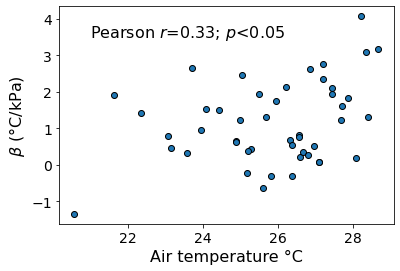

In [5]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)  
ax.scatter(Ta-273.15,optimal_beta.sel(exposure='outdoor'),edgecolors='k',linewidth=1)
ax.set_xlabel('Air temperature °C',fontsize=16)
ax.set_ylabel(r'$\beta$ (°C/kPa)',fontsize=16)
ax.tick_params(axis='both', labelsize=14)
r=xr.corr(Ta-273.15,optimal_beta.sel(exposure='outdoor')).values #calculate pearson correlation
ax.text(21,3.5,r'Pearson $r$='+f"{r.item():.2f}; "+'$p$<0.05',fontsize=16)

**Fig. S1.** Scatterplot of optimal β for the outdoor formulation of GHSI against summer-mean air temperature across prefectures. Pearson correlation r and the p-value are shown on the panel. Removing Hokkaido (the lower-leftmost point) lowers the correlation to r = 0.22 with p = 0.15.